In [247]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

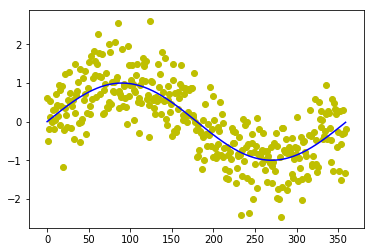

In [272]:
#Generating our data set
def data_without_noise(size):
    x = np.arange(0,360,360/size)
    y = np.sin(x*np.pi/180)
    return x, y

def data_with_noise(size):
    x = np.arange(0,360,360/size)
    y = np.sin(x*np.pi/180) + np.random.normal(0,0.6,size=len(x))
    return x, y

xraw, yraw = data_without_noise(360)
xcorr, ycorr = data_with_noise(360)
plt.plot(xraw, yraw, color='b')
plt.scatter(xcorr, ycorr, color='y')
plt.show()

In [195]:
def fit_linear(x, y, degree_polynomial):
    model = LinearRegression()
    model.fit(np.vander(x,degree_polynomial+1),y)
    return model

def predict_model(x, model):
    return model.predict(np.vander(x,model.coef_.size))

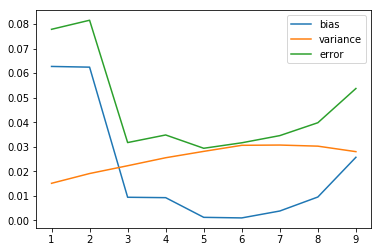

In [202]:
from numpy.linalg import norm
n_models = 1500
degrees  = np.arange(1,10,1)
n_size   = 50
bias     = []
variance = []
error    = []
for degree in degrees:
    average_pred = np.zeros(n_size)
    predictions_list  = []
    for i in range(n_models):
        x, y          = data_with_noise(n_size)
        model         = fit_linear(x, y, degree)
        prediction    = predict_model(x, model)
        average_pred += prediction
        predictions_list.append(prediction)
        
    average_pred = average_pred/n_models
    bias_degree  = norm(average_pred - yraw)/yraw.size
    bias.append(bias_degree)
    var = 0
    for y_hat in predictions_list:
        var += norm(y_hat-average_pred)
    var /= yraw.size * n_models  
    variance.append(var)
    error.append(bias_degree+var) 
plt.plot(degrees,bias,label='bias')
plt.plot(degrees,variance,label = 'variance')
plt.plot(degrees,error, label = 'error')
plt.legend()
plt.show()

In [267]:
X_train, X_test, y_train, y_test = train_test_split(xcorr,ycorr,test_size=0.33,random_state=42)

In [273]:
train_error = []
test_error  = []
for degree in np.arange(1,21,1):
    model = fit_linear(X_train,y_train,degree)
    train_pred = predict_model(X_train,model)
    test_pred = predict_model(X_test,model)
    train_error.append(mean_squared_error(y_train,train_pred))
    test_error.append(mean_squared_error(y_test,test_pred))
    

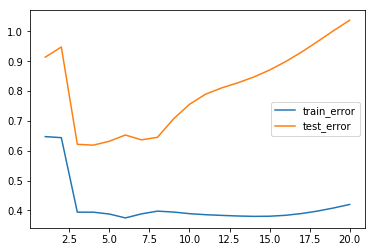

In [274]:
plt.plot(np.arange(1,21,1), train_error,label='train_error')
plt.plot(np.arange(1,21,1), test_error,label='test_error')
plt.legend()
plt.show()